## Assignment 2
## P556: Applied Machine Learning
### Due date: Saturday, March 2, 11:59PM

# Problem 1

## Problem 1.1 (40 points)

Implement a multi-class logistic regression model.

The l2_reg parameter is used for L2-Regularization. The default value is 0, which means no regularization. Non-0 values will be used to pass the corresponding lambda value. 

The iters parameter sets the maximum number of times that we will update the weights.

The early_stopping parameter will be used to set a threshold that will cause the model to stop training when the loss between iterations is equal or less than the parameter value.

In [27]:
# Logistic regression code
def logistic_regression(X, y, iters=500, early_stopping=0.00001, l2_reg=0.5):
    learning_rate = 1
    iterations = 0
    prev_loss = 0
    X = np.insert(X, 0, np.array([1]).T, axis = 1)
    X = np.insert(X, 2, np.square(X[:,1]).T, axis = 1)
    X = np.insert(X, 4, np.square(X[:,3]).T, axis = 1)
    theta = np.array([0.0] * X.shape[1])
    theta = np.reshape(theta, (X.shape[1],1))
    while iterations<iters:
        h_theta = 1/(1+(np.exp(-(np.dot(X, theta)))))
        loss = np.mean((-y * np.log(h_theta) - (1-y) * np.log(1-h_theta)))
        if abs(loss-prev_loss) < early_stopping : break
        prev_loss = loss
        reg_factor = 1 - ((learning_rate * l2_reg)/X.shape[0])
        gradient = np.dot(X.T, (h_theta-y))/y.shape[0]
        theta = (theta*reg_factor) - (learning_rate * gradient)
        iterations = iterations + 1
    return theta 



## Problem 1.2 (10 points)

Test your model using the three class dataset that we have included in the next cell. Using the following regularization values: None, 0.5, 10.0. Which of the values gives a better threshold?

________________________________________________________________________________________________________________________
Classifying samples with target value 0:
The respective weights are [[-3.60868558]
 [-3.26044094]
 [ 0.57855087]
 [-2.1792371 ]
 [-0.282913  ]]:


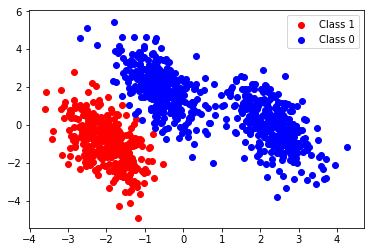

________________________________________________________________________________________________________________________
Classifying samples with target value 1:
The respective weights are [[ 2.01012307]
 [-1.84933747]
 [-3.07051245]
 [ 1.87404407]
 [ 0.24659873]]:


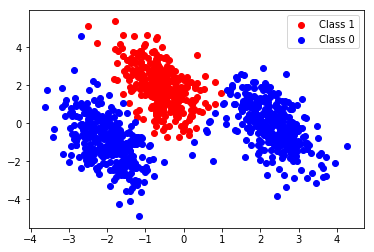

________________________________________________________________________________________________________________________
Classifying samples with target value 2:
The respective weights are [[-3.21768004]
 [ 3.60440507]
 [ 0.92268896]
 [ 0.13634825]
 [-0.27950733]]:


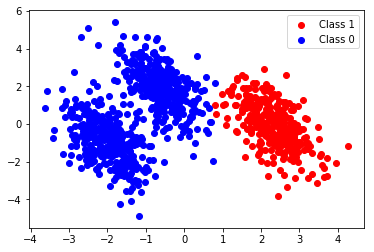

________________________________________________________________________________________________________________________
I tested the model with 0, 0.5 and 10 as the lambda value for regularization, 0.5 seemed to give a better threshold but there was not much difference between 0 and 0.5,and a lambda value of 10 caused underfitting.


In [28]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

ori_x = X
y = np.reshape(y, (1000,1))
original_y = y.copy()
w = []

for label in range(len(centers)):
    y = original_y.copy()
    for i in range(len(y)):
        if y[i] == label: y[i] = 1 
        else:y[i] = 0
    w.append((logistic_regression(X, y, iters=1000, early_stopping=0.00001, l2_reg=0.5)))
    
X = np.insert(X, 0, np.array([1]).T, axis = 1)
X = np.insert(X, 2, np.square(X[:,1]).T, axis = 1)
X = np.insert(X, 4, np.square(X[:,3]).T, axis = 1)

red_x, red_y = [[],[],[]], [[],[],[]]
blue_x, blue_y = [[],[],[]], [[],[],[]]

for c in range(3):
    print("_" * 120)
    pred = np.dot(X,w[c])
    print("Classifying samples with target value %s:" %(c))
    print("The respective weights are %s:" %(w[c]))
    for i in range(len(y)):
        if pred[i] >= 0 : red_x[c].append(ori_x[i][0]), red_y[c].append(ori_x[i][1])
        elif pred[i] < 0: blue_x[c].append(ori_x[i][0]), blue_y[c].append(ori_x[i][1])
    plt.scatter(red_x[c], red_y[c], c = 'red', label = 'Class 1'), plt.scatter(blue_x[c],blue_y[c], c = 'blue', label = 'Class 0')
    plt.legend(),plt.show()
print("_" * 120)
print("I tested the model with 0, 0.5 and 10 as the lambda value for regularization, 0.5 seemed to give a better threshold but there was not much difference between 0 and 0.5,and a lambda value of 10 caused underfitting.")



# Problem 2

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Use the function you wrote in the previous assignment to plot this dataset!model. Note: cannot use the name 'perceptron' nor binary classification, that would make it way too easy to look up in Google.

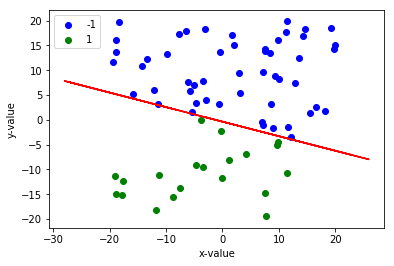

In [29]:
import random
import matplotlib.pyplot as plt
    
def generate_dataset(k0, k1):
    
    a,b,c,x,y = random.uniform(-20,20), random.uniform(-20,20), random.uniform(-20,20), random.sample(range(-30,30), 10), []

    [y.append(-((a*x[i])+c)/b) for i in range(len(x))]

    plt.plot(x,y,color = 'r')

    samples, target_values = [],[]
    
    k0_x, k0_y = [], []
    while len(samples) <= k0:
        x, y = random.uniform(-20,20), random.uniform(-20,20)
        if (a*x)+(b*y)+c < 0: k0_x.append(x), k0_y.append(y), samples.append([x,y]), target_values.append(-1)

    k1_x, k1_y = [], []
    while len(samples) <= (k0+k1):
        x, y = random.uniform(-20,20), random.uniform(-20,20)
        if (a*x)+(b*y)+c > 0: k1_x.append(x), k1_y.append(y), samples.append([x,y]), target_values.append(1)

    plt.scatter(k0_x,k0_y,color ='b',label='-1')
    plt.scatter(k1_x,k1_y,color ='g',label='1')
    plt.xlabel('x-value'),plt.ylabel('y-value'),plt.legend()
    plt.show()
    
    return np.array(samples), np.array(target_values)

X,y = generate_dataset(50,20)

## Problem 2.2 (35 points)

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





The corresponding weights are [ -31.         -182.59250037 -708.18489776]


array([ -31.        , -182.59250037, -708.18489776])

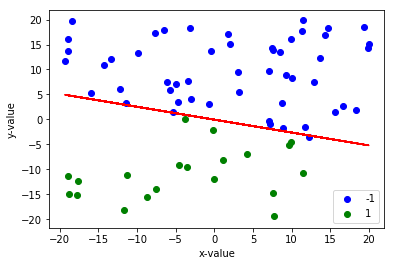

In [30]:
def fit(X,y):
    w, X = np.array([0.0] * (len(X[0])+1)), np.insert(X, 0, np.array([1]).T, axis = 1)
    lower_x, lower_y, upper_x, upper_y = [], [], [], []
    
    for i in range(len(X)):
        if y[i] == -1: lower_x.append(X[:,1][i]), lower_y.append(X[:,2][i])
        elif y[i] == 1: upper_x.append(X[:,1][i]), upper_y.append(X[:,2][i])
        if np.dot(X[i], w.T) != y[i]: w = w + (y[i] * X[i])

    x_plot, y_plot = X[:,1], []
    [y_plot.append(-(w[0] + (w[1] * X[i][1]))/w[2]) for i in range(len(X))]
    
    plt.scatter(lower_x, lower_y, color = 'b',label='-1'), plt.scatter(upper_x, upper_y, color = 'g',label='1')
    plt.xlabel('x-value'),plt.ylabel('y-value'), plt.legend()
    plt.plot(x_plot, y_plot, color = 'r')
    
    print("The corresponding weights are %s" %(w))
    return w
fit(X,y)

### Problem 2.3 (5 points)
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

The weight matrix 'w' represents the weights of the line equation which seperates given a set of points. A point chosen at random will either fall on the left side or the right side of the line, if the point is correctly classified then there is no need to change the weights but if it is misclassified then we adjust the weights towards the opposite direction.
With the equation $ax+by+c=0$, any point that is $ax+by+c<0$ is of class $-1$ and any point that is $ax+by+c>0$ is of class $1$. For example if a point which is of class $1$ is misclassified as $-1$ we take a product of the features and the target values and then update the weights with the product which makes the weights move in the opposite direction. As the algorithm is iterative, at the end of all iterations the weights would have adjusted accordingly.

### Problem 2.4 (5 points)
What happens when the data is not linearly separable? What can be done to salvage the situation?

This algorithm will fail to converge when the data is not linear.
We can salvage the situation by,

1.Changing the plane equation to a parabolic or circle equation depending on the spread of data.

2. We can do a pattern analysis to study the correlation of the data and try to transform it into another dimension where the data is linearly seperable.